# Preprocessing

### Importing libraries and datasets

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cleaning_functions as cf 

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [2]:
# Import of linear regression model created by James 

def linear_regression(X_train, X_test, y_train, y_test):
    # Linear regression
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    print(f'model coefficients:\n {model.coef_}\n')
    print(f'model intercept:\n {model.intercept_}\n')

    # Applying model to X test
    y_pred = model.predict(X_test)

    # Ensure y_test is in the correct format (pandas Series or 1D numpy array)
    if isinstance(y_test, pd.Series):
        y_test_reset = y_test.reset_index(drop=True)
    else:
        y_test_reset = y_test  # Assuming y_test is already a numpy array

    # Creating combined table with y_test and y_pred
    # Check if y_test_reset is a pandas Series and convert y_pred to a similar type
    if isinstance(y_test_reset, pd.Series):
        y_pred_series = pd.Series(y_pred, index=y_test_reset.index, name='y_pred')
        residuals_df = pd.concat([y_test_reset, y_pred_series], axis=1)
    else:
        # If inputs are numpy arrays, stack them horizontally
        residuals_df = np.column_stack((y_test_reset, y_pred))
        # Convert to DataFrame for easier manipulation later on
        residuals_df = pd.DataFrame(residuals_df, columns=["y_test", "y_pred"])

    # Calculating residuals
    residuals_df["residual"] = residuals_df["y_test"] - residuals_df["y_pred"]
    print(f'Residuals:\n {residuals_df}\n')

    # Root mean squared error
    rmse = mse(y_test_reset, residuals_df["y_pred"], squared=False)
    print(f'Root mean squared error: {rmse} \n')

    # R^2
    r2 = r2_score(y_test_reset, residuals_df["y_pred"])
    print(f'R2: {r2} \n')

    # Calculating adjusted R^2
    n = X_train.shape[0]  # Number of observations in the training set
    p = X_train.shape[1]  # Number of features used for training
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'Adjusted R2: {adjusted_r2} \n')

    return model.coef_


In [3]:
combined_file_path = '../data/cleaned/winequality_combined_cleaned.csv' 
combined_df = pd.read_csv(combined_file_path)
combined_df

,wine_type_red,wine_type_white,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,0,1,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
5316,0,1,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
5317,0,1,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5318,0,1,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Distributions

<Figure size 1500x1500 with 0 Axes>

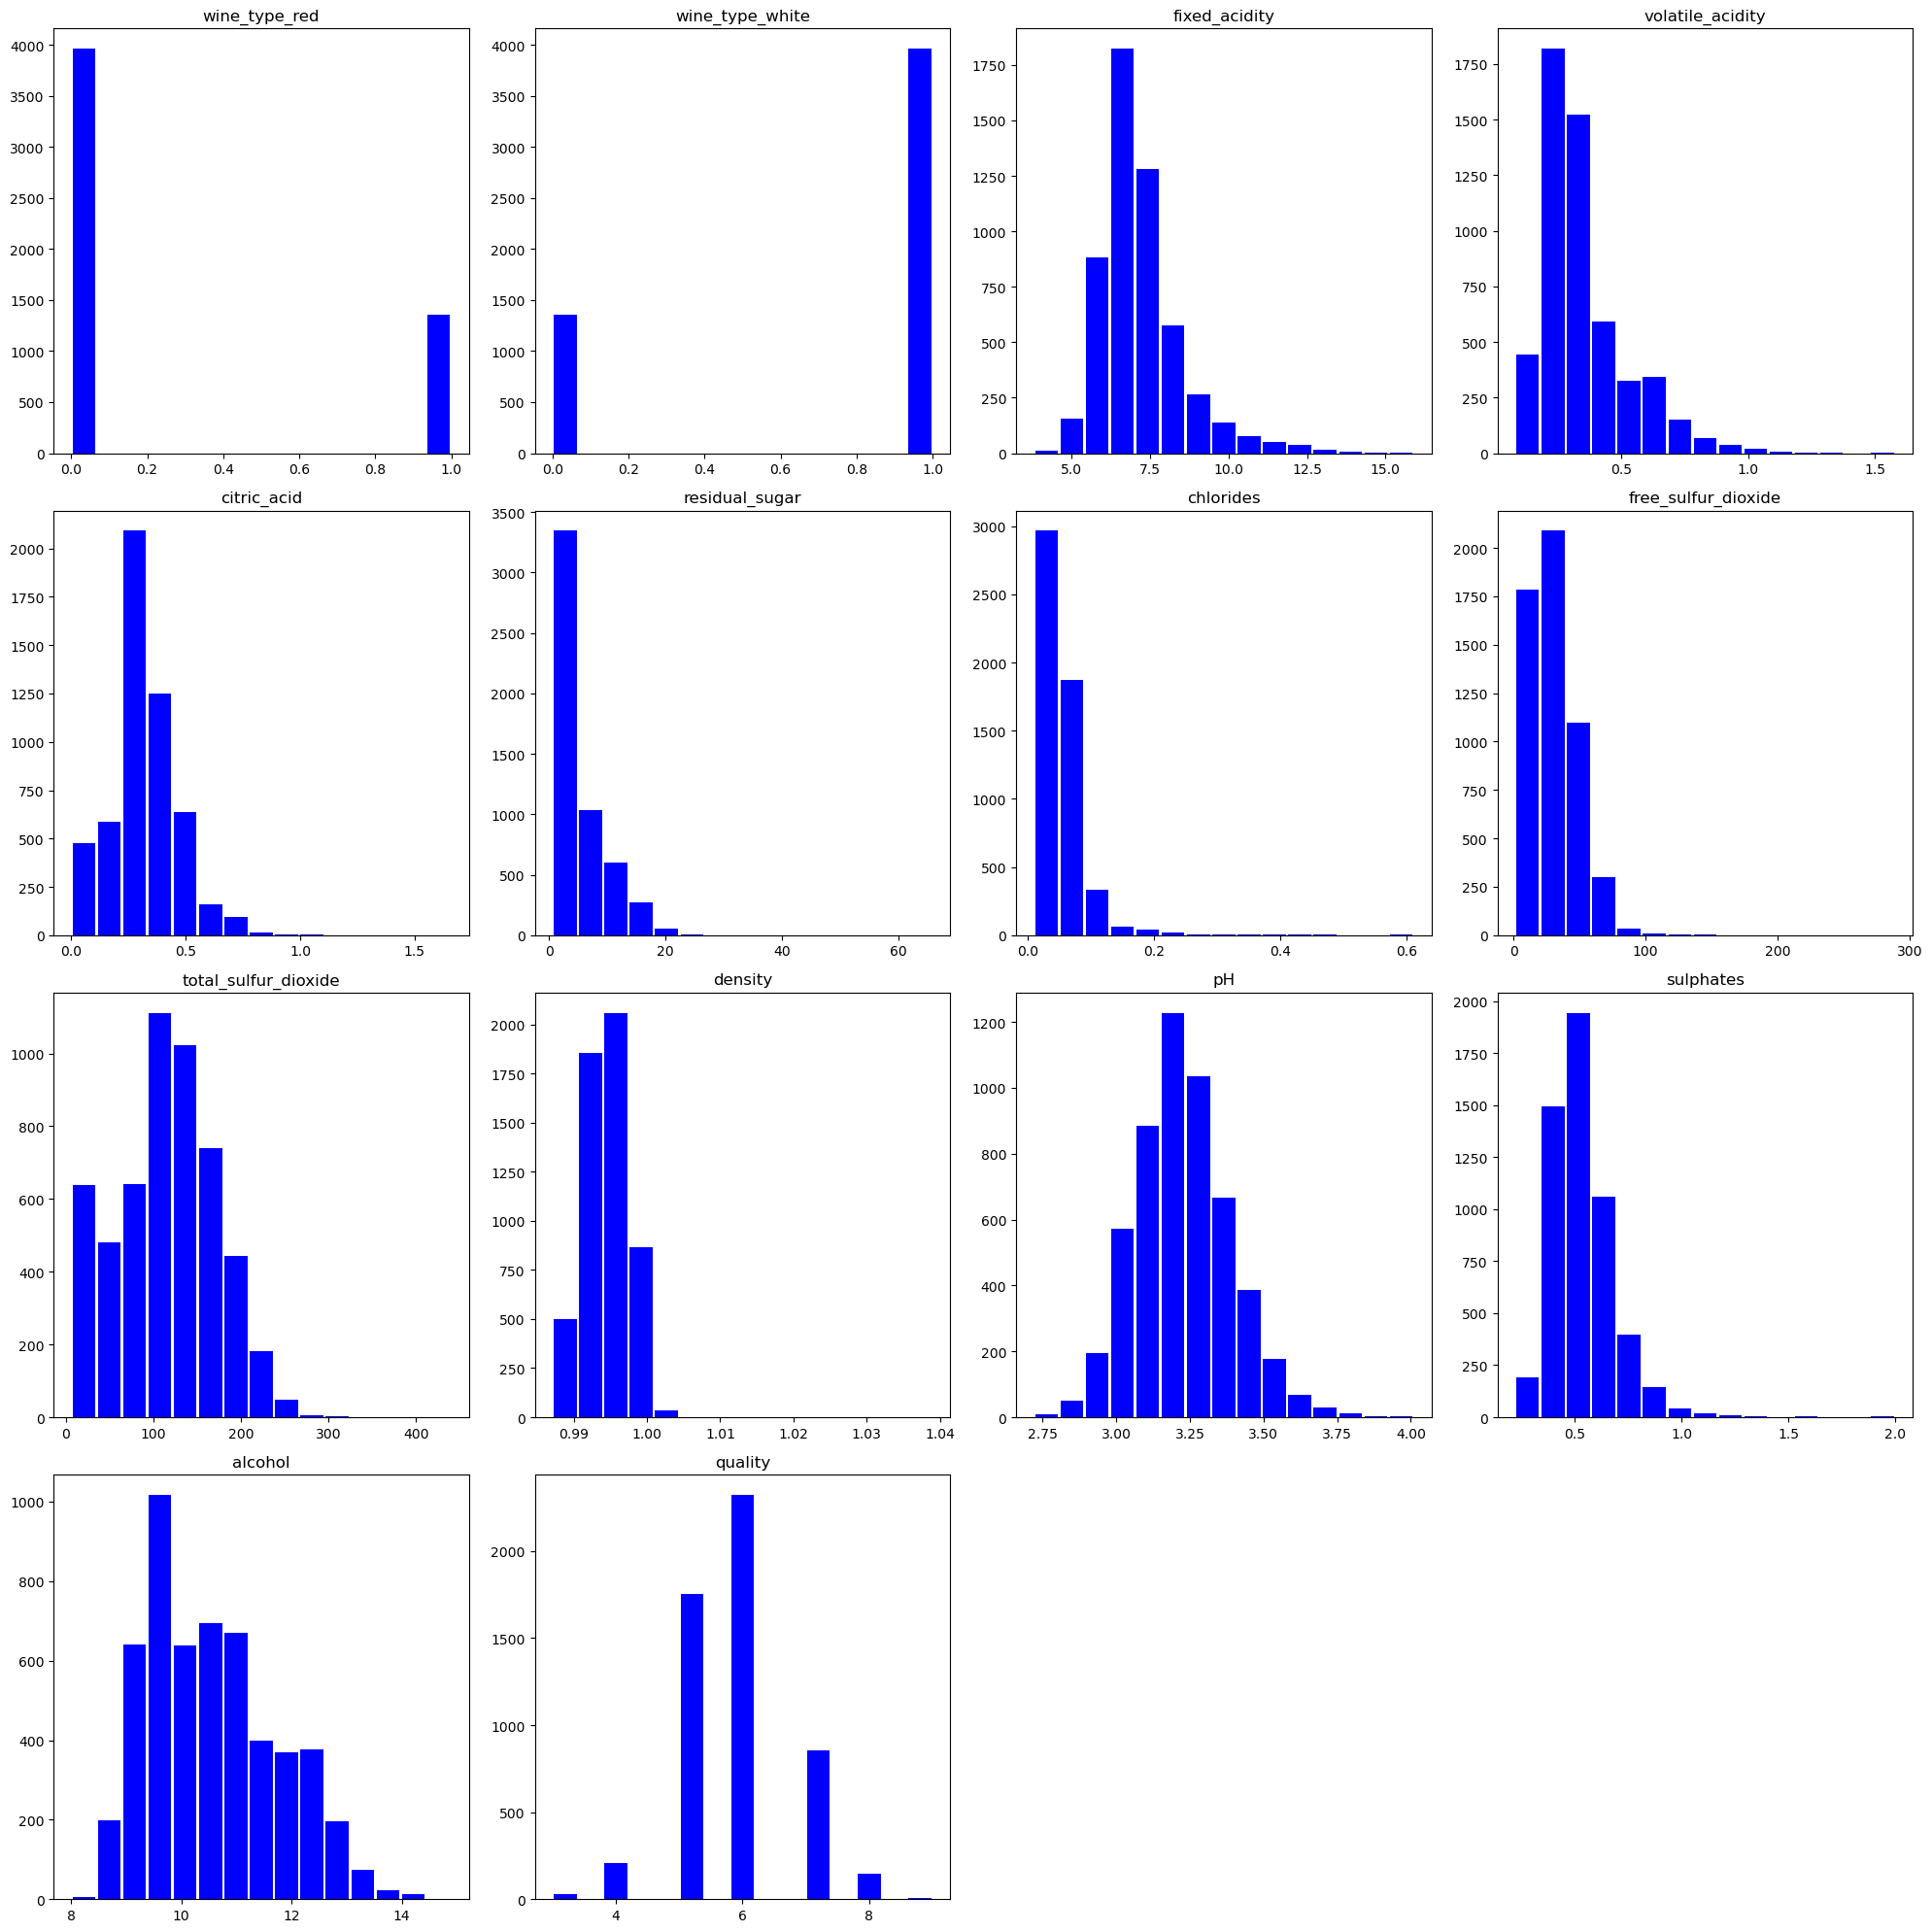

In [4]:
plt.figure(figsize=(15, 15))
combined_df.hist(bins=15, grid=False, figsize=(20, 20), color='blue', zorder=2, rwidth=0.9)
plt.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.show()

### Splitting data into X and y

In [5]:
#define X and Y
X = combined_df.drop(['quality','wine_type_red'], axis=1)
y = combined_df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### Applying Standard Scaler to X

In [6]:
scaler = StandardScaler()

In [7]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train))
X_test_ss= pd.DataFrame(ss.transform(X_test))

### Applying MinMax Scaler to Y

In [8]:
# Initialize MinMaxScaler for the target variable
scaler_y = MinMaxScaler()

# Fit and transform the target variable for the training data
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()

# Transform the target variable for the testing data
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1)).ravel()

### Linear Regression Model

In [9]:
coefficients = linear_regression (X_train_ss, X_test_ss, y_train_scaled, y_test_scaled)

model coefficients:
 [-0.0181543   0.01120218 -0.03653126  0.00417086  0.03551572 -0.00607295
  0.01755407 -0.01719955 -0.04019835  0.01276761  0.01986829  0.04897907]

model intercept:
 0.4662907268170415

Residuals:
         y_test    y_pred  residual
0     0.500000  0.462383  0.037617
1     0.500000  0.515749 -0.015749
2     0.666667  0.589343  0.077323
3     0.333333  0.461458 -0.128125
4     0.500000  0.577906 -0.077906
...        ...       ...       ...
1325  0.500000  0.464506  0.035494
1326  0.333333  0.452733 -0.119399
1327  0.333333  0.545195 -0.211861
1328  0.666667  0.580549  0.086118
1329  0.333333  0.372131 -0.038797

[1330 rows x 3 columns]

Root mean squared error: 0.12050744247583241 

R2: 0.3149956658951397 

Adjusted R2: 0.3129287682312578 



### Determining the importance of a variable 

In [19]:
feature_names = list(X_train.columns)

In [20]:
coefficients = list(coefficients)

In [21]:
coefficients_list = [coefficients]

In [22]:
coefficients_list = [i for i in coefficients_list[0]]

In [23]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,wine_type_white,-0.123541
1,fixed_acidity,0.076232
2,volatile_acidity,-0.248598
3,citric_acid,0.028383
4,residual_sugar,0.241687
5,chlorides,-0.041327
6,free_sulfur_dioxide,0.119457
7,total_sulfur_dioxide,-0.117044
8,density,-0.273552
9,pH,0.086884


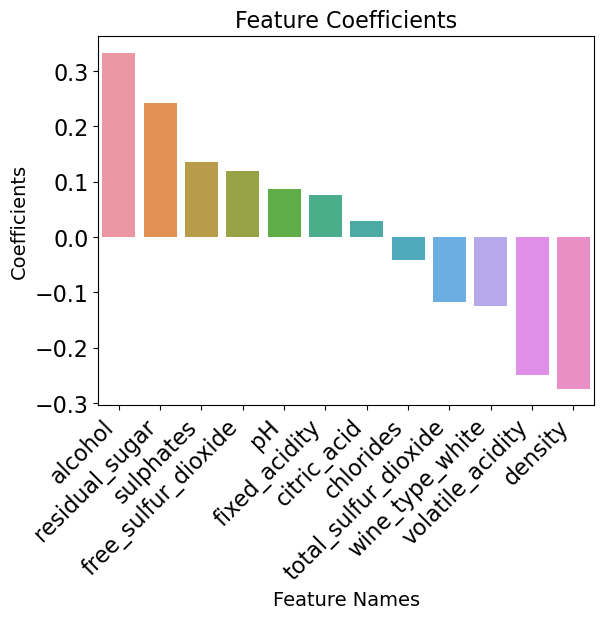

<Figure size 1200x600 with 0 Axes>

In [24]:
# Sort values descending 

fi_df_sorted = fi_df.sort_values(by='coeff', ascending=False)

# Bar plot 

sns.barplot(x=fi_df_sorted["name"], y=fi_df_sorted["coeff"])

# Additional formatting to improve readability 

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Feature Names", fontsize=14)  # Adjust x-axis label font size
plt.ylabel("Coefficients", fontsize=14)  # Adjust y-axis label font size
plt.title("Feature Coefficients", fontsize=16)  # Adjust title font size

# Adjust the figure size for better readability

plt.figure(figsize=(12, 6))

plt.show()